In [22]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [23]:
def load_dataset():
  fashion_mnist = keras.datasets.fashion_mnist
  (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
  x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
  x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  return x_train, y_train, x_test, y_test

In [24]:
def prep_pixels(train, test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  return train_norm, test_norm

In [25]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28,1)))
    model.add(MaxPooling2D((2,2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [26]:
def evaluate_model(dataX, dataY, n_folds=5):
	scores, histories = list(), list()
	kfold = KFold(n_folds, shuffle=True, random_state=1)
	for train_ix, test_ix in kfold.split(dataX):
		model = define_model()
		x_train, y_train, x_test, y_test = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		history = model.fit(
    x=x_test,
    y=y_test,
    batch_size=32,
    epochs=10,
    verbose=0,
    callbacks=None,
    validation_split=0.0,
    validation_data=(x_test, y_test),
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)
		_, acc = model.evaluate(x_test, y_test)
		print('> %.3f' % (acc * 100.0))
		scores.append(acc)
		histories.append(history)
	return scores, histories

In [27]:
def summarize_diagnostics(histories):
	for i in range(len(histories)):
		plt.subplot(211)
		plt.title('Cross Entropy Loss')
		plt.plot(histories[i].history['loss'], color='blue', label='train')
		plt.plot(histories[i].history['val_loss'], color='orange', label='test')
		plt.subplot(212)
		plt.title('Classification Accuracy')
		plt.plot(histories[i].history['accuracy'], color='blue', label='train')
		plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	plt.show()

In [28]:
def summarize_performance(scores):
  print('Accuracy: mean=%.3f std=%.3f, n=%d' % (mean(scores)*100, std(scores)*100, len(scores)))
  plt.boxplot(scores)
  plt.show()

In [29]:
def run_test_harness():
  x_train, y_train, x_test, y_test = load_dataset()
  x_train, x_test = prep_pixels(x_train, x_test)
  scores, histories = evaluate_model(x_train, y_train)
  summarize_diagnostics(histories)
  summarize_performance(scores)

375/375 [==============================] - 3s 7ms/step - loss: 0.1085 - accuracy: 0.9628
> 96.283
375/375 [==============================] - 3s 7ms/step - loss: 0.1232 - accuracy: 0.9594
> 95.942
375/375 [==============================] - 3s 7ms/step - loss: 0.1111 - accuracy: 0.9632
> 96.325
375/375 [==============================] - 3s 7ms/step - loss: 0.1311 - accuracy: 0.9536
> 95.358
375/375 [==============================] - 3s 7ms/step - loss: 0.1003 - accuracy: 0.9664
> 96.642


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


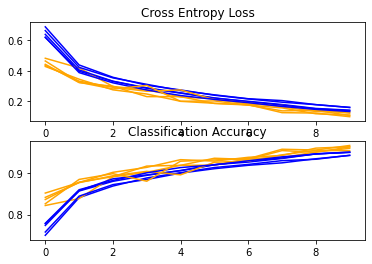

Accuracy: mean=96.110 std=0.436, n=5


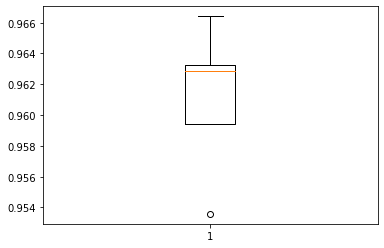

In [30]:
run_test_harness()